# Example NTV

In [1]:
from ntv import NtvSingle, NtvList, NtvSet, Ntv

## All JSON data is JSON-NTV data
Codification : 
- first letter: "v" (NtvSingle), "l" (NtvList), "s" (NtvSet)
- additional letters: 'N' (named), 'T' (typed)

In [2]:
liste = [None, 1, [1,2], {'key': 'value'}, {'key1': 'val1', 'key2': 'val2'}, 
         {'example': [21, [1,2], {'key1': 3, 'key2': 4}]}]
for js in liste:
    ntv = Ntv.obj(js)
    print('{:<50} {} {}'.format(str(ntv), 'codification : ', repr(ntv)))

null                                               codification :  "v"
1                                                  codification :  "v"
[1, 2]                                             codification :  {"l": ["v", "v"]}
{"key": "value"}                                   codification :  "vN"
{"key1": "val1", "key2": "val2"}                   codification :  {"s": ["vN", "vN"]}
{"example": [21, [1, 2], {"key1": 3, "key2": 4}]}  codification :  {"lN": ["v", {"l": ["v", "v"]}, {"s": ["vN", "vN"]}]}


## NTV data is named
- a name can be added or remove

In [3]:
simple = Ntv.obj(3)

print(simple)
simple.set_name('value')
print(simple)
simple.set_name('')
print(simple)

3
{"value": 3}
3


## NTV data is typed
- default type is 'json'


In [4]:
# {':json' : 21} and 21 are equivalent
print(Ntv.obj({':json' : 21}) == Ntv.obj(21))

True


- types can be predefined

{'paris:point': {'paris': <shapely.geometry.point.Point object at 0x000001B961C5C880>}}


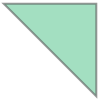

In [18]:
# {'paris:point' : [4.1, 40.5] } indicates that the object named 'paris' has geographical coordinates [4.1, 40.5]
city = Ntv.obj({'paris:point' : [4.1, 40.5] })
print(city.to_obj(encode_format='obj'))

# another coordinates are available (e.g. line, polygon)
city = Ntv.obj({':polygon' : [[[0,1], [1,1], [1,0], [0,1]]] })
city.to_obj(encode_format='obj')

## custom types are allowed
For example:
- object defined by a list of parameters
- object defined by a list of key/values.

In [25]:
measurement = Ntv.obj({':$sensor': [3.51, 4.2, 'mg/m3', [4.1, 45.2]]})

print('measurement : ', measurement)
print('infos : ', measurement[1], measurement[3], measurement.type_str, '\n')

person = Ntv.obj({'main Breaking Bad character:$character': {'surname': 'white', 'first name': 'walter', 'alias': 'heisenberg'}})

print('personage : ', person)
print('infos : ', person['alias'], person.type_str)

measurement :  {":$sensor": [3.51, 4.2, "mg/m3", [4.1, 45.2]]}
infos :  4.2 [4.1, 45.2] $sensor 

personage :  {"main Breaking Bad character:$character": {"surname": "white", "first name": "walter", "alias": "heisenberg"}}
infos :  heisenberg $character


## NTV data is nested
- Two structures with ordered or non ordered collections are available
- The type can be shared between entities included in the same entity
- the type defined in a structure is a default type

In [7]:
# ordered structure
cities1 = Ntv.obj({'cities':        [{'paris:point': [4.1, 40.5]}, {':point': [4.5, 41.2]}]})
cities2 = Ntv.obj({'cities::point': [{'paris':       [4.1, 40.5]},            [4.5, 41.2] ]})

# unordered structure
cities3 = Ntv.obj({'cities::point': {'paris':       [4.1, 40.5], 'lyon':       [4.5, 41.2]}})
cities4 = Ntv.obj({'cities':        {'paris:point': [4.1, 40.5], 'lyon:point': [4.5, 41.2]}})

print('equivalent structures ? ', cities1 == cities2 and cities3 == cities4)

# default type in a structure
cities5 = Ntv.obj({'cities::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2], {':date': '2012-02-15'}]})
print('coordinates and date in a typed structure : ', cities5)

equivalent structures ?  True
coordinates and date in a typed structure :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2], {":date": "2012-02-15"}]}


## NTV-json representation is equivalent to NTV entity
- The entity build with the Json representation of another entity is identical to the original NTV entity

In [8]:
Ntv.obj(simple. to_obj()) == simple  and \
Ntv.obj(city.   to_obj()) == city    and \
Ntv.obj(cities2.to_obj()) == cities2 and \
Ntv.obj(cities4.to_obj()) == cities4

True

## Options are available for NTV-json
- selected values
- encoded data
- data format

In [9]:
print('only values   : ', cities2.to_obj(simpleval=True))
print('Json text     : ', cities2.to_obj(encoded=True))
print('Json binary   : ', cities2.to_obj(encode_format='cbor', encoded=True))
print('tuple format  : ', cities2.to_obj(encode_format='tuple'))
print('object format : ', cities2.to_obj(encode_format='obj'))
print('simple Json   : ', cities2.to_repr())
print('Json codes    : ', cities2.to_repr(False, False, False))

only values   :  [[4.1, 40.5], [4.5, 41.2]]
Json text     :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2]]}
Json binary   :  b'\xa1mcities::point\x82\xa1eparis\xa1eparis\x82\xfb@\x10ffffff\xf9Q\x10\x82\xf9D\x80\xfb@D\x99\x99\x99\x99\x99\x9a'
tuple format  :  ('cities', 'point', [('paris', 'point', [4.1, 40.5]), ('', 'point', [4.5, 41.2])])
object format :  {'cities::point': [{'paris': {'paris': <shapely.geometry.point.Point object at 0x000001B961C5E980>}}, <shapely.geometry.point.Point object at 0x000001B961C5D7B0>]}
simple Json   :  {'l-cities-point': ['v-paris-point-[4.1, 40.5]', 'v-point-[4.5, 41.2]']}
Json codes    :  {'lNT': ['vNT', 'vT']}


In [14]:
json = Ntv.obj({'student': [{'name': ['john', 'eric', 'judith']}, 
                               {'age': [15, 54, 48]}, 
                               {'city': [{"paris": [4.1, 40.5]}, [4.5, 41.2]]}]})
print(json.to_obj(simpleval=True))

[['john', 'eric', 'judith'], [15, 54, 48], [[4.1, 40.5], [4.5, 41.2]]]


In [21]:
import pandas as pd
df = Ntv.obj({'student:tab': [{'name::string': ['john', 'eric', 'judith']}, 
                               {'age::number': [15, 54, 48]}, 
                               {'city::point': [{"paris": [4.1, 40.5]}, [4.5, 41.2], [2.5, 40.2]]}]})
df2 = Ntv.obj({'student': [{'name::string': ['john', 'eric', 'judith']}, 
                           {'age::number': [15, 54, 48]}, 
                           {'city::point': [{"paris": [4.1, 40.5]}, [4.5, 41.2], [2.5, 40.2]]}]})
df_pd = pd.DataFrame({'name::string': ['john', 'eric', 'judith'], 
                      'age::number': [15, 54, 48], 
                      'city::point': [{"paris": [4.1, 40.5]}, [4.5, 41.2], [2.5, 40.2]]})

print(repr(df), '\n', repr(df2), '\n')
print(df.to_obj(encode_format='tuple'))
fields = list(df2)
print(fields[1])
print(fields[1][2])
print(df_pd)

"vNT" 
 {"lN": [{"lNT": ["vT", "vT", "vT"]}, {"lNT": ["vT", "vT", "vT"]}, {"lNT": ["vNT", "vT", "vT"]}]} 

('student', 'tab', [{'name::string': ['john', 'eric', 'judith']}, {'age::number': [15, 54, 48]}, {'city::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2], [2.5, 40.2]]}])
{"age::number": [15, 54, 48]}
{":number": 48}
  name::string  age::number             city::point
0         john           15  {'paris': [4.1, 40.5]}
1         eric           54             [4.5, 41.2]
2       judith           48             [2.5, 40.2]


In [16]:
lis = [[4.1, 40.5], [4.5, 41.2], [2.5, 40.2]]
#lis2 = {':':[[4.1, 40.5], [4.5, 41.2], [2.5, 40.2]]}
nlis =Ntv.obj(lis)

nlis.set_name('cities')
nlis[0].set_name('paris')
print(nlis)
print(repr(nlis))

nlis.set_type('point')
print(nlis)
print(repr(nlis))

{"cities": [{"paris": [4.1, 40.5]}, [4.5, 41.2], [2.5, 40.2]]}
{"lN": [{"lN": ["v", "v"]}, {"l": ["v", "v"]}, {"l": ["v", "v"]}]}


TypeError: str_type() missing 1 required positional argument: 'single'